<center>
<img src="./images/00_main_arcada.png" style="width:1400px">
</center>

# Machine Learning For Descriptive Problems

## *aka Descriptive Analytics*

## Instructors:
* Leonardo A. Espinosa-leal, PhD. (espinosl@arcada.fi)
* Amin Maj, PhD & DSc. (majdamin@arcada.fi)
* Andrej Shcherbakov-Parland, MSc. (parland@arcada.fi)

# Content 
* Lecture 1 (13.01): Finding similar items (Leo)
* Lecture 2 (14.01): Sequential Models (Amin) 
* Lecture 3 (27.01): Frequent itemsets.
* Lecture 4 (28.01): Time series and forecasting (Amin)
* Lecture 5 (10.02): $\Rightarrow$**Graphs and social networks**$\Leftarrow$ (Leo)
* Lecture 6 (11.02): NLP (Amin)


<center><img src="images/00_questions.jpg",width=1200></center>

## Lecture 5: Graphs and Social Networks.
>Leonardo A. Espinosa, Senior Lecturer in Big Data Anlytics.   
Email: leonardo.espinosaleal@arcada.fi    
Personal webpage: www.espinosaleal.me

# First, let's talk about the next two courses

**BDA and Optimization & Analytical Service Development.**

* For BDA (Amin, Kaj-Mikael & Leo):
    * Big Data Analytics & Optimisation
    * One final project with big data (aim: big dataset*).
    * Group project of max. 3 
    * optimization part can be evaluated differently.


* For ASD (Magnus, Kaj-Mikael & Leo):
    * Business goal.
    * Analytical goal.
    * Creation of a service or product (interactive web, app, library, API, visualization, etc.)
    * Group project of max. 3
    
 **Important**. Find one dataset that can you use for both projects. 

# Types of datasets

* One from your employer -> If and only if you already have access to it.
* One from the internet (Kaggle or any other source)
* Create your own data.

<center><img src="images/00_questions.jpg",width=1200></center>

# Goal for today
* Understand the basic methods for analysing social networks.
* Use different software tools for the analysis of graphs and social networks.

# Index

1\. <a href="#/9/1">Motivation</a>


2\. <a href="#/15/1">Community Detection</a>
   * <a href="#/24/1">Betweeness</a>
   * <a href="#/58/1">Counting triangles</a>
   
3\. <a href="#/75/1">Spectral clustering</a>:

4\. <a href="#/122/1">Transitive Closure</a>

5\. <a href="#/135/1">Analysis of the Large graphs</a>
   * <a href="#/136/1">Trawling</a>
   * <a href="#/143/1">Overlapping communities</a>

<center><img src="images/social.jpg",width=1000></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-1.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-2.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-3.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-4.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-5.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-6.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-7.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-8.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-9.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-10.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-11.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-12.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-13.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-14.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-15.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-16.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-17.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-18.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-19.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-20.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-21.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-22.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-23.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-24.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-25.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-26.jpg",width=1200></center>

<center><img src="images/00_questions.jpg",width=1200></center>

<center><img src="images/00_coding.png",width=1200></center>

<center><img src="images/networkx.png",width=500></center>

> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

https://networkx.github.io/

In [ ]:
#! pip install networkx

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import itertools

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

edges = [('A','B'),('A','C'),('B','C'),('B','D'),('D','E'),('D','G'),('D','F'),('E','F'),('G','F')]

pos = {'A': [0.0, 0.0], 'B': [1.0, 0.0], 'C': [0.5, -1.0], 'D': [2.0, 0.0],
        'E': [3.0,  0.0], 'F': [3.0,  -1.0], 'G': [2.0, -1.0]}

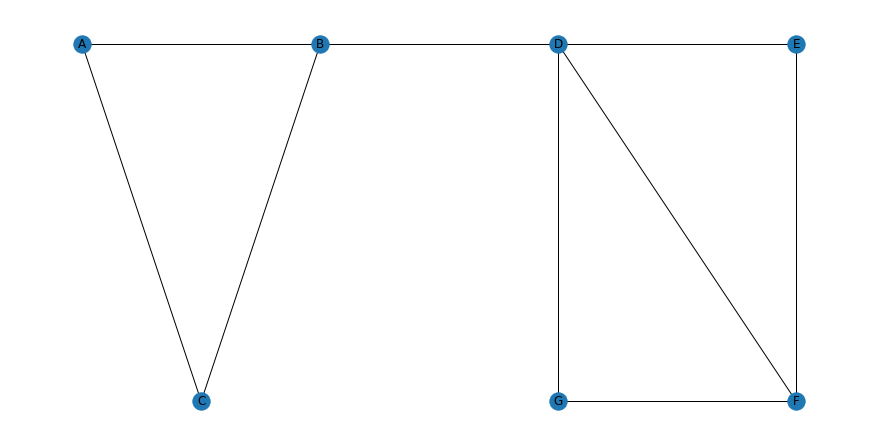

In [2]:
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G,pos,with_labels = True)
#nx.draw(G,with_labels = True)

In [3]:
from networkx import edge_betweenness_centrality as betweenness

comp = betweenness(G,normalized=False)
print(comp)

G1 = nx.Graph()
G1.add_edges_from(edges)

{('A', 'B'): 5.0, ('A', 'C'): 1.0, ('B', 'C'): 5.0, ('B', 'D'): 12.0, ('D', 'E'): 4.5, ('D', 'G'): 4.5, ('D', 'F'): 4.0, ('E', 'F'): 1.5, ('G', 'F'): 1.5}


{('A', 'B'): Text(0.5, 0.0, '5.0'),
 ('A', 'C'): Text(0.25, -0.5, '1.0'),
 ('B', 'C'): Text(0.75, -0.5, '5.0'),
 ('B', 'D'): Text(1.5, 0.0, '12.0'),
 ('D', 'E'): Text(2.5, 0.0, '4.5'),
 ('D', 'G'): Text(2.0, -0.5, '4.5'),
 ('D', 'F'): Text(2.5, -0.5, '4.0'),
 ('E', 'F'): Text(3.0, -0.5, '1.5'),
 ('G', 'F'): Text(2.5, -1.0, '1.5')}

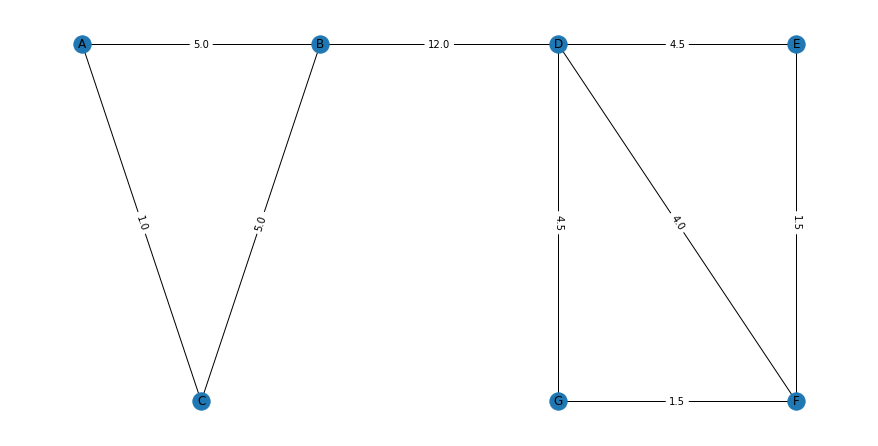

In [4]:
nx.draw(G1,pos,with_labels = True)
comp_b = betweenness(G1,normalized=False)
nx.draw_networkx_edge_labels(G1,pos,edge_labels = comp_b)

In [5]:
from networkx.algorithms.community.centrality import girvan_newman
from operator import itemgetter
from time import sleep

def heaviest(G):
    u, v, w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)

In [6]:
# getting the weights
comp_b = betweenness(G1,normalized=False)

#print(comp_b)

# New graph
Gw = nx.Graph()


for a,b in zip(comp_b.keys(),comp_b.values()):
        Gw.add_edge(a[0], a[1], weight=b)

k = 3

print(list(Gw.nodes))
print("Clusters")
comp_gn = girvan_newman(Gw, most_valuable_edge=heaviest)
for communities in itertools.islice(comp_gn, k):
    sleep(2)
    print(tuple(sorted(c) for c in communities))

['A', 'B', 'C', 'D', 'E', 'G', 'F']
Clusters
(['A', 'B', 'C'], ['D', 'E', 'F', 'G'])
(['A', 'C'], ['B'], ['D', 'E', 'F', 'G'])
(['A', 'C'], ['B'], ['D'], ['E', 'F', 'G'])


<center><img src="images/00_questions.jpg",width=1200></center>

Now a more real example!

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# load data
data = np.loadtxt("data/Cross_Parker-Manufacturing_aware.txt").astype(np.int)
#data = np.loadtxt("data/OF_two-mode_weightedmsg.txt").astype(np.int)
print(data)

[[ 1  2  6]
 [ 1  3  2]
 [ 1  5  2]
 ...
 [77 74  5]
 [77 75  5]
 [77 76  3]]


### Example of a weighted network

In [8]:
# make the graph
N = 77    # nodes
w1 = 5    # threshold's weight 

G = nx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)

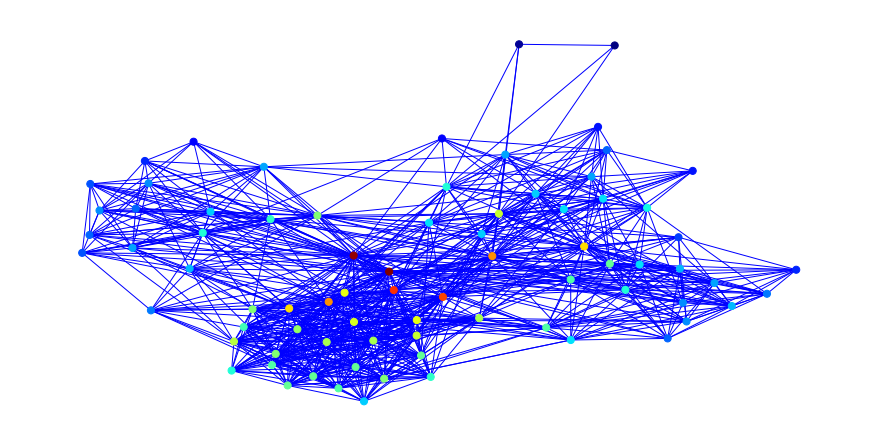

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# show graph
node_degrees_1 = nx.degree(G)
node_degrees = list(dict(node_degrees_1).values())
nx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

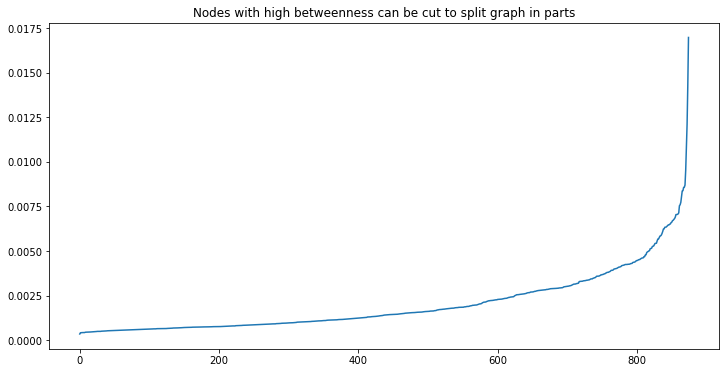

In [10]:
# print betweenness
bt = list(nx.edge_betweenness(G).values())
plt.plot(range(len(bt)), sorted(bt))
plt.title("Nodes with high betweenness can be cut to split graph in parts")
#plt.ylim([0, 0.02])
plt.show()

In [11]:
# remove edges with betweenness larger than threshold
thr = 0.0025 # around 70% of the max value
while True:
    bt = nx.edge_betweenness(G)
    
    i = np.argmax(list(bt.values()))
    if list(bt.values())[i] < thr:
        break
    n1, n2 = list(bt.keys())[i]
    G.remove_edge(n1, n2)

# clean graph from single-node components for easy printing
for n, d in list(nx.degree(G)):
    if d == 0:
        G.remove_node(n)

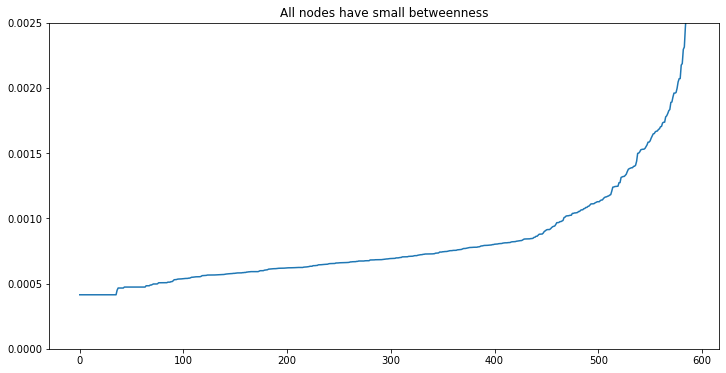

In [12]:
# print new betweenness
bt = nx.edge_betweenness(G).values()
plt.plot(range(len(bt)), sorted(bt))
plt.title("All nodes have small betweenness")
plt.ylim([0, 0.0025])
plt.show()

In [13]:
print(nx.__version__)

2.6.3


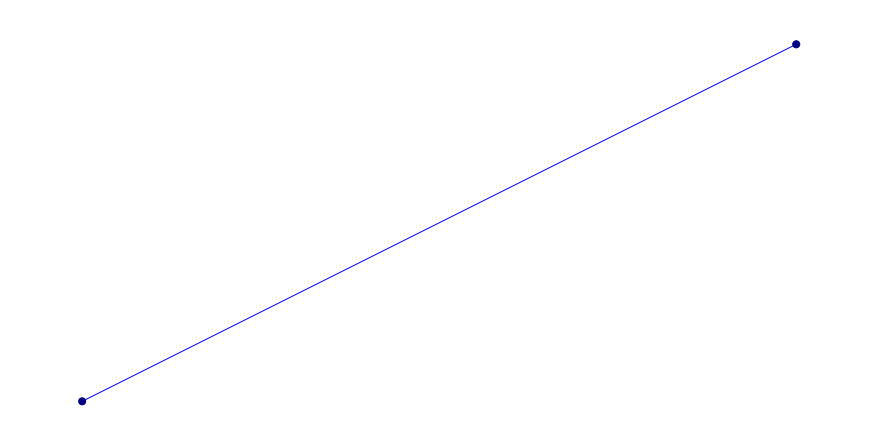

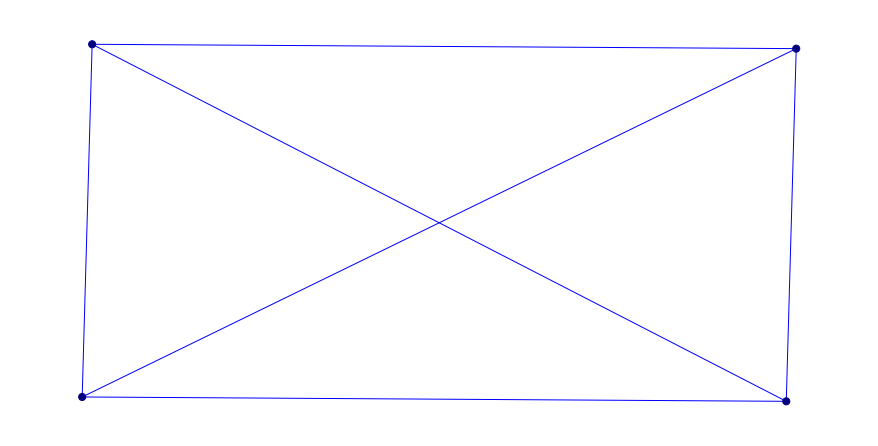

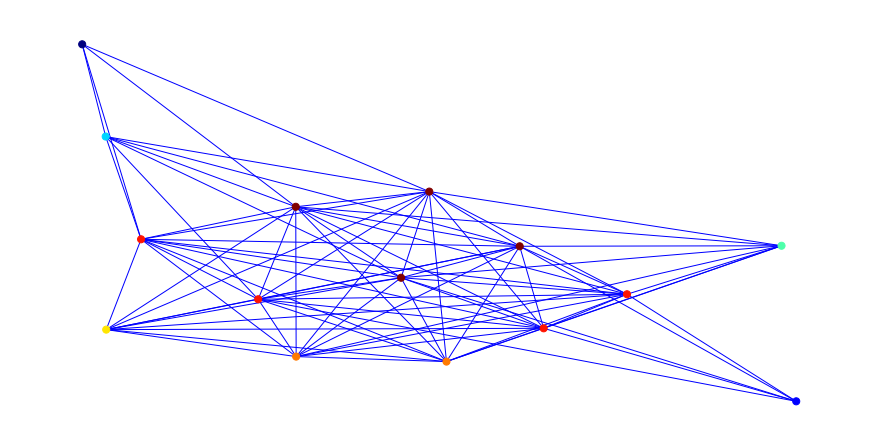

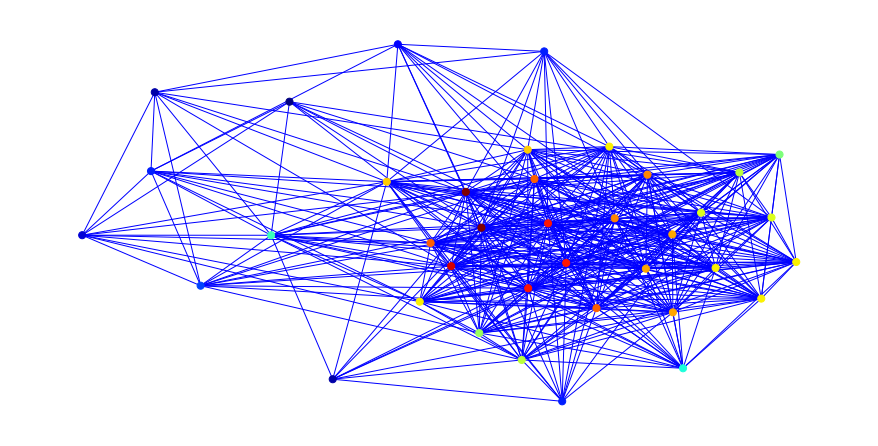

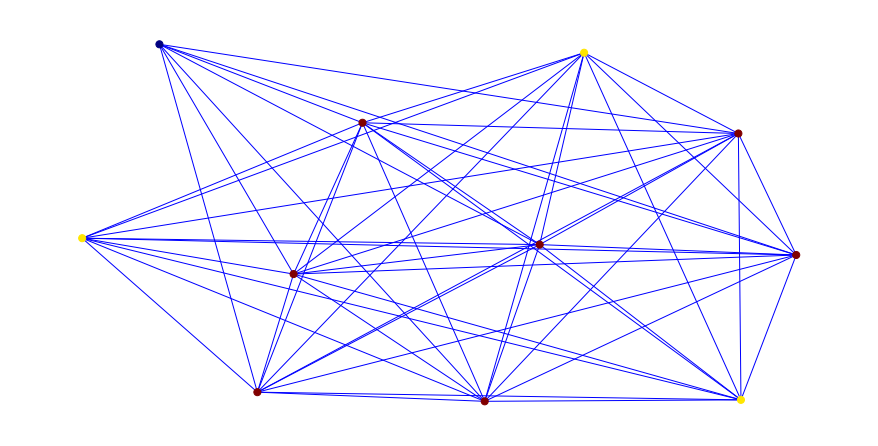

In [14]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
# print found components
#for G1 in nx.connected_component_subgraphs(G):  # for nx < 2.4 version
for G1 in connected_component_subgraphs(G): # for nx >= 2.4 version
    node_degrees = list(dict(nx.degree(G1)).values())
    nx.draw(G1, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
    plt.show()

<center><img src="images/00_questions.jpg",width=1200></center>

# Using https://cytoscape.org/

Jupyter integration: https://blog.jupyter.org/interactive-graph-visualization-in-jupyter-with-ipycytoscape-a8828a54ab63

More: https://github.com/cytoscape/ipycytoscape

In [16]:
!pip install ipycytoscape
#!pip install ipycytoscape

# Need to restart jupyter and activate the Nbextension :(

     |████████████████████████████████| 3.6 MB 2.7 MB/s eta 0:00:01


In [17]:
from ipycytoscape import CytoscapeWidget
import networkx as nx
G2 = nx.complete_graph(5)
cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G2)
display(cyto)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'css': {'background-c…

In [18]:
import ipycytoscape
import ipywidgets as widgets

cytoscapeobj = ipycytoscape.CytoscapeWidget()
button = widgets.Button(description="nx graph")
output = widgets.Output()

# Generates a NX graph every time you click the button
def on_button_clicked(b):
    with output:
        cytoscapeobj.graph.add_graph_from_networkx(nx.complete_graph(5))

button.on_click(on_button_clicked)
widgets.HBox([button, cytoscapeobj])

In [19]:
cytoscapeobj = ipycytoscape.CytoscapeWidget()
button = widgets.Button(description="nx graph")
output = widgets.Output()

# Generates a NX graph every time you click the button
def on_button_clicked(b):
    with output:
        cytoscapeobj.graph.add_graph_from_networkx(G)

button.on_click(on_button_clicked)
widgets.HBox([button, cytoscapeobj])

<center><img src="images/00_questions.jpg",width=1200></center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

* Find the communities for the dataset  *OF_two-mode_weightedmsg.txt*. Hint: `data = np.loadtxt("data/OF_two-mode_weightedmsg.txt").astype(np.int)`
* Filter the dataset for a threshold of w1 = 5, how many communities the network have upon filtering the edges with betweenness of around 80% of the max value.

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-27.jpg",width=1200></center>

<center><img src="images/00_questions.jpg",width=1200></center>

<center><img src="images/00_break.png",width=1200> Break?</center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-28.jpg",width=1200></center>

* A null model is type of random object that matches one specific object in some of its features, or more generally satisfies a collection of constraints, but which is otherwise taken to be an unbiasedly random structure. 
* The null model is used as a term of comparison, to verify whether the object in question displays some non-trivial features (properties that wouldn't be expected on the basis of chance alone or as a consequence of the constraints), such as community structure in graphs. An appropriate null model behaves in accordance with a reasonable null hypothesis for the behavior of the system under investigation.

* One null model of utility in the study of complex networks is that proposed by Newman and Girvan, consisting of a randomized version of an original graph $G$, produced through edges being rewired at random, under the constraint that the expected degree of each vertex matches the degree of the vertex in the original graph.

Check original paper $\to$ https://arxiv.org/abs/cond-mat/0308217 or https://journals.aps.org/pre/abstract/10.1103/PhysRevE.69.026113

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-29.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-30.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-31.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-32.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-33.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-34.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-35.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-36.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-37.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-38.jpg",width=1200></center>

<center><img src="images/00_questions.jpg",width=1200></center>

<center><img src="images/00_coding.png",width=1200></center>

In [ ]:
import networkx as nx
 
G2 = nx.Graph()
 
G2.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
                  ('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
                  ('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')])
 
nx.draw_networkx(G2, with_labels = True, node_color ='green')
print(nx.triangles(G2))

In [ ]:
number_of_triangles = sum(nx.triangles(G2).values()) / 3
print(number_of_triangles)

In [ ]:
cliq_list = list(nx.clique.enumerate_all_cliques(G2))
triangle_list = [ x for x in cliq_list if len(x)==3]
print(triangle_list)

In [ ]:
%matplotlib inline  
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# load data
data = np.loadtxt("data/Cross_Parker-Manufacturing_aware.txt").astype(np.int)

# make the graph
N = 77
w1 = 6

G = nx.Graph()
for i in range(1, N):
    G.add_node(i)
for n1, n2, w in data:
    if w >= w1:
        G.add_edge(n1, n2, weight=w)
        


In [ ]:
print(nx.triangles(G))

In [ ]:
number_of_triangles = sum(nx.triangles(G).values()) / 3
print(number_of_triangles)

In [ ]:
cliq_list = list(nx.clique.enumerate_all_cliques(G))
triangle_list = [ x for x in cliq_list if len(x)==3]


In [ ]:
print(triangle_list)

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-40.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-41.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-42.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-43.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-44.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-45.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-46.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-47.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-48.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-49.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-50.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-51.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-52.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-53.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-54.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-55.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-56.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-57.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-58.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-59.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-60.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-61.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-62.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-63.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-64.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-65.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-66.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-67.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-68.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-69.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-70.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-71.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-72.jpg",width=1200></center>

<center><img src="images/00_questions.jpg",width=1200></center>

<center><img src="images/00_coding.png",width=1200></center>

In [20]:
%matplotlib inline  
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]

# load data
data = np.loadtxt("data/Cross_Parker-Manufacturing_aware.txt").astype(np.int)
N = 77
wt = 4

# create and populate the graph
G = nx.Graph()
for i in range(1, N+1):
    G.add_node(i)
for n1, n2, w in data:
    if w >= wt:
        G.add_edge(n1, n2, weight=w)

L = nx.laplacian_matrix(G).toarray()

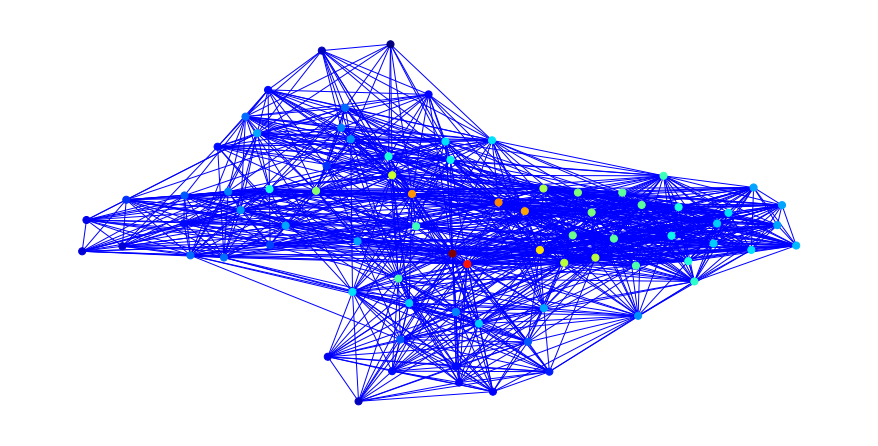

In [21]:
# show graph
node_degrees = list(dict(nx.degree(G)).values())
nx.draw(G, node_size=50, edge_color="b", cmap=plt.get_cmap('jet'), node_color = node_degrees)
plt.show()

In [ ]:
#np.linalg.svd?

In [22]:
# find eigenvectors of Laplacian matrix,
# take second smallest and third smallest
u,s,v = np.linalg.svd(L)
ev2 = u[:, -2]
ev3 = u[:, -3]

In [23]:
u.shape

(77, 77)

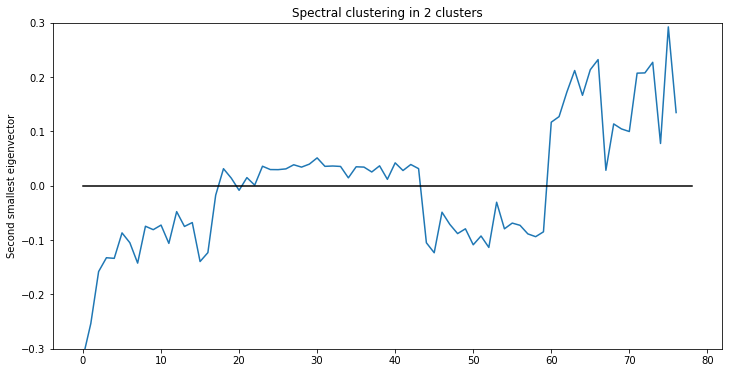

In [24]:
# print second smallest eigenvector
plt.plot(ev2)
plt.ylim([-0.3, 0.3])
plt.plot([0, 78], [0, 0], '-k')
plt.title("Spectral clustering in 2 clusters")
plt.ylabel("Second smallest eigenvector")
plt.show()

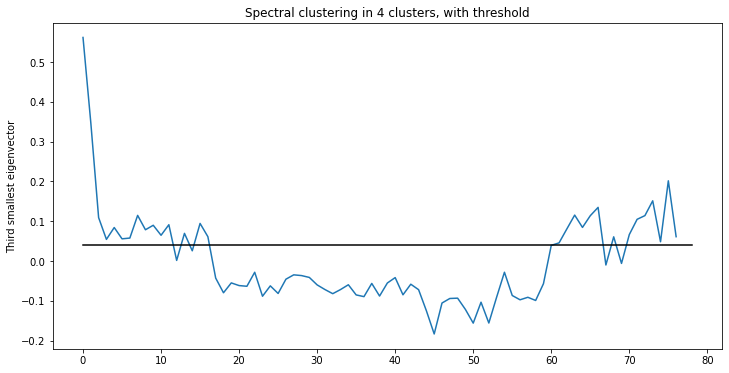

In [25]:
# print third smallest eigenvector
plt.plot(ev3)
plt.plot([0, 78], [0.04, 0.04], '-k')
plt.title("Spectral clustering in 4 clusters, with threshold")
plt.ylabel("Third smallest eigenvector")
plt.show()

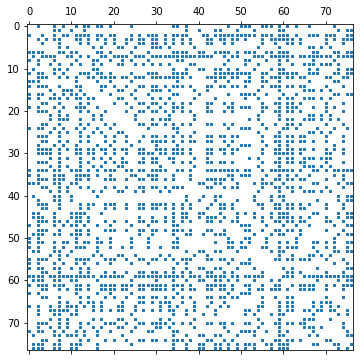

In [26]:
# adjacency matrix of un-ordered graph (JUST one examle)
ix = np.arange(N)
np.random.shuffle(ix)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

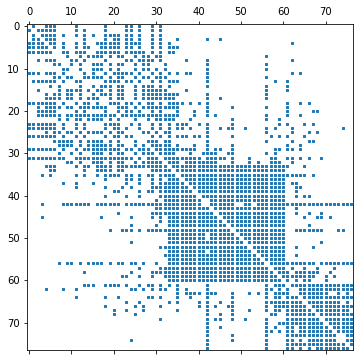

In [27]:
# adjacency matrix ordered by 2nd smallest eigenvector
ix = np.argsort(ev2)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

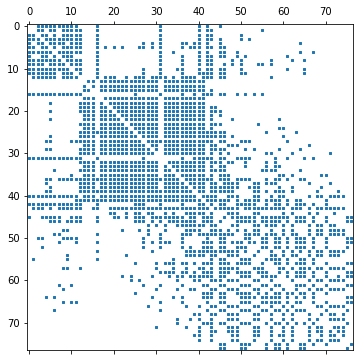

In [28]:
# adjacency matrix ordered by 3rd smallest eigenvector
ix = np.argsort(ev3)
A = nx.adjacency_matrix(G)
A = A[ix,:][:,ix]
plt.spy(A, markersize=2.0)

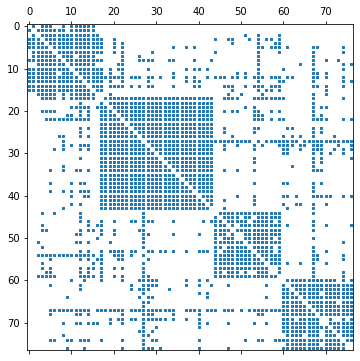

In [29]:
# ideal adjacency matrix (from the original dataset)
A = nx.adjacency_matrix(G)
plt.spy(A, markersize=2.0)

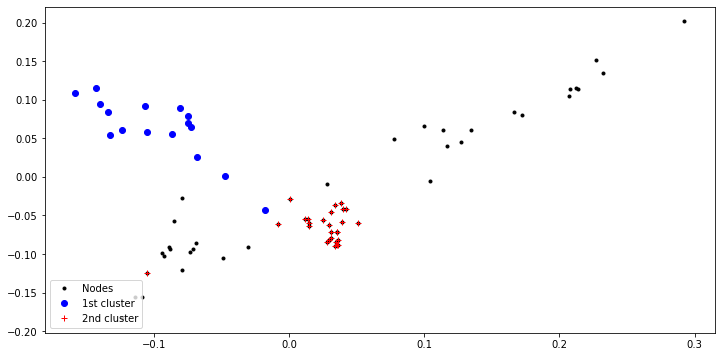

In [30]:
# graph shown in coordinates of two last eigenvectors
vert = dict(nx.degree(G)).keys()
plt.plot(ev2[2:], ev3[2:], '.k')
plt.plot(ev2[2:18], ev3[2:18], 'ob')
plt.plot(ev2[18:45], ev3[18:45], '+r')
plt.legend(['Nodes', '1st cluster', '2nd cluster'], loc=3)
plt.show()

<center><img src="images/00_questions.jpg",width=1200></center>

<center>
<img src="./images/00_hands-on.jpg" style="width:1200px">
</center>

* Find the spectral matrices for the dataset  *OF_two-mode_weightedmsg.txt*.

<center><img src="images/00_break.png",width=1200>Break?</center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-73.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-74.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-75.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-76.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-77.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-78.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-79.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-80.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-105.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-106.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-108.jpg",width=1200></center>

<center><img src="images/00_questions.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-b-1.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-b-2.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-b-3.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-b-4.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-b-5.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-b-6.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-b-7.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks-b-8.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-1.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-2.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-3.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-4.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-5.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-6.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-7.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-8.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-9.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-10.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-11.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-12.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-13.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-14.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-15.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-16.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-17.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-18.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-19.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-20.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-21.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-22.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-23.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-24.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-25.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-26.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-27.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-28.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-29.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-30.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-31.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-32.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-33.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-34.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-35.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-36.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-37.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-38.jpg",width=1200></center>

<center><img src="images/Lecture_5_Graphs_and_Social_Networks_II-39.jpg",width=1200></center>

<center><img src="images/00_questions.jpg",width=1200></center>

<center><img src="images/snap.png",width=500></center>

https://snap.stanford.edu/index.html

https://cs.stanford.edu/people/jure/pubs/bigclam-wsdm13.pdf

https://cs.stanford.edu/people/jure/pubs/agmfit-icdm12.pdf

In [ ]:
#!pip install snap-stanford

In [ ]:
status = False
try:
    import snap
    version = snap.Version
    i = snap.TInt(5)
    if i == 5:
        status = True
except:
    pass

if status:
    print("SUCCESS, your version of Snap.py is %s" % (version))
else:
    print("*** ERROR, no working Snap.py was found on your computer")



In [ ]:
import snap

def intro():

    # create a graph PNGraph
    G1 = snap.TNGraph.New()
    G1.AddNode(1)
    G1.AddNode(5)
    G1.AddNode(32)
    G1.AddEdge(1,5)
    G1.AddEdge(5,1)
    G1.AddEdge(5,32)
    print("G1: Nodes %d, Edges %d" % (G1.GetNodes(), G1.GetEdges()))

    # create a directed random graph on 100 nodes and 1k edges
    G2 = snap.GenRndGnm(snap.TNGraph, 100, 1000)
    print("G2: Nodes %d, Edges %d" % (G2.GetNodes(), G2.GetEdges()))

    # traverse the nodes
    for NI in G2.Nodes():
        print("node id %d with out-degree %d and in-degree %d" % (
            NI.GetId(), NI.GetOutDeg(), NI.GetInDeg()))
    # traverse the edges
    for EI in G2.Edges():
        print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

    # traverse the edges by nodes
    for NI in G2.Nodes():
        for Id in NI.GetOutEdges():
            print("edge (%d %d)" % (NI.GetId(), Id))

    # generate a network using Forest Fire model
    G3 = snap.GenForestFire(1000, 0.35, 0.35)
    print("G3: Nodes %d, Edges %d" % (G3.GetNodes(), G3.GetEdges()))

    # save and load binary
    FOut = snap.TFOut("test.graph")
    G3.Save(FOut)
    FOut.Flush()
    FIn = snap.TFIn("test.graph")
    G4 = snap.TNGraph.Load(FIn)
    print("G4: Nodes %d, Edges %d" % (G4.GetNodes(), G4.GetEdges()))

    # save and load from a text file
    G4.SaveEdgeList("test.txt", "Save as tab-separated list of edges")
    G5 = snap.LoadEdgeList(snap.TNGraph, "test.txt", 0, 1)
    print("G5: Nodes %d, Edges %d" % (G5.GetNodes(), G5.GetEdges()))

    # generate a network using Forest Fire model
    G6 = snap.GenForestFire(1000, 0.35, 0.35)
    print("G6: Nodes %d, Edges %d" % (G6.GetNodes(), G6.GetEdges()))
    # convert to undirected graph
    G7 = G6.ConvertGraph(snap.TUNGraph)
    print("G7: Nodes %d, Edges %d" % (G7.GetNodes(), G7.GetEdges()))
    # get largest weakly connected component of G
    WccG = G6.GetMxWcc()
    # get a subgraph induced on nodes {0,1,2,3,4,5}
    SubG = G6.GetSubGraph([0,1,2,3,4])
    # get 3-core of G
    Core3 = G6.GetKCore(3)
    # delete nodes of out degree 10 and in degree 5
    G6.DelDegKNodes(10, 5)
    print("G6: Nodes %d, Edges %d" % (G6.GetNodes(), G6.GetEdges()))

    # generate a Preferential Attachment graph on 1000 nodes and node out degree of 3
    G8 = snap.GenPrefAttach(1000, 3)
    print("G8: Nodes %d, Edges %d" % (G8.GetNodes(), G8.GetEdges()))
    # get distribution of connected components (component size, count)
    CntV = G8.GetWccSzCnt()
    # get degree distribution pairs (degree, count)
    CntV = G8.GetOutDegCnt()
    # get first eigenvector of graph adjacency matrix
    EigV = G8.GetLeadEigVec()
    # get diameter of G8
    G8.GetBfsFullDiam(100)
    # count the number of triads in G8, get the clustering coefficient of G8
    G8.GetTriads()
    G8.GetClustCf()

In [ ]:
intro()

# Software and ready-made tools
* gephi (https://gephi.org/)
* Cytoscape (https://cytoscape.org/)
* NodeXL (https://www.smrfoundation.org/nodexl/)
* Graphviz (https://www.graphviz.org/)
* Bigclam (https://github.com/snap-stanford/snap/tree/master/examples/bigclam)

Other services:
* textexture (https://textexture.com)
* Noduslab (https://noduslabs.com/)

In [ ]:
import IPython

iframe = '<iframe width="500" height="500" src="https://www.textexture.com/index.php?text_id=711&embed=1&width=500&height=500" frameborder="0" allowfullscreen></iframe>'
IPython.display.HTML(iframe)

Lolita, light of my life, fire of my loins. My sin, my soul. Lo-lee-ta: the tip of the tongue taking a trip of three steps down the palate to tap, at three, on the teeth. Lo. Lee. Ta.
She was Lo, plain Lo, in the morning, standing four feet ten in one sock. She was Lola in slacks. She was Dolly at school. She was Dolores on the dotted line. But in my arms she was always Lolita.
Did she have a precursor? She did, indeed she did. In point of fact, there might have been no Lolita at all had I not loved, one summer, a certain initial girl-child. In a princedom by the sea. Oh when? About as many years before Lolita was born as my age was that summer. You can always count on a murderer for a fancy prose style.
Ladies and gentlemen of the jury, exhibit number one is what the seraphs, the misinformed, simple, noble-winged seraphs, envied. Look at this tangle of thorns.
I was born in 1910, in Paris. My father was a gentle, easy-going
person, a salad of racial genes: a Swiss citizen, of mixed French and Austrian descent, with a dash of the Danube in his veins. I am going to pass around in a minute some lovely, glossy-blue picture-postcards. He owned a luxurious hotel on the Riviera. His father and two grandfathers had sold wine, jewels and silk, respectively. At thirty he married an English girl, daughter of Jerome Dunn, the alpinist, and granddaughter of two Dorset parsons, experts in obscure subjects--paleopedology and Aeolian harps, respectively. My very photogenic mother died in a freak accident (picnic, lightning) when I was three, and, save for a pocket of warmth in the darkest past, nothing of her subsists within the hollows and dells of memory, over which, if you can still stand my style (I am writing under observation), the sun of my infancy had set: surely, you all know those redolent remnants of day suspended, with the midges, about some hedge in bloom or suddenly entered and traversed by the rambler, at the bottom of a hill, in the summer dusk; a furry warmth, golden midges.
My mother's elder sister, Sybil, whom a cousin of my father's had married and then neglected, served in my immediate family as a kind of unpaid governess and housekeeper. Somebody told me later that she had been in love with my father, and that he had lightheartedly taken advantage of it one rainy day and forgotten it by the time the weather cleared. I was extremely fond of her, despite the rigidity--the fatal rigidity--of some of her rules. Perhaps she wanted to make of me, in the fullness of time, a better widower than my father. Aunt Sybil had pink-rimmed azure eyes and a waxen complexion. She wrote poetry. She was poetically superstitious. She said she knew she would die soon after my sixteenth birthday, and did. Her husband, a great traveler in perfumes, spent most of his time in America, where eventually he founded a firm and acquired a bit of real estate.
I grew, a happy, healthy child in a bright would of illustrated books, clean sand, orange trees, friendly dogs, sea vistas and smiling faces. Around me the splendid Hotel Mirana revolved as a kind of private universe, a whitewashed cosmos within the blue greater one that blazed outside. From the aproned pot-scrubber to the flanneled potentate, everybody liked me, everybody petted me. Elderly American ladies leaning on their canes listed towards me like towers of Pisa. Ruined Russian princesses who could not pay my father, bought me expensive bonbons. He, mon cher petit papa, took me out boating and biking, taught me to swim and dive and water-ski, read to me Don Quixote and Les Miserables, and I adored and respected him and felt glad for him whenever I overheard the servants discuss his various lady-friends, beautiful and kind beings who made much of me and cooed and shed precious tears over my cheerful motherlessness.
I attended an English day school a few miles from home, and there I played rackets and fives, and got excellent marks, and was on perfect terms with schoolmates and teachers alike. The only definite sexual events that I
can remember as having occurred before my thirteenth birthday (that is, before I first saw my little Annabel) were: a solemn, decorous and purely theoretical talk about pubertal surprises in the rose garden of the school with an American kid, the son of a then celebrated motion-picture actress whom he seldom saw in the three-dimensional world; and some interesting reactions on the part of my organism to certain photographs, pearl and umbra, with infinitely soft partings, in Pichon's sumptuous La Beautè Humaine that that I had filched from under a mountain of marble-bound Graphics in the hotel library. Later, in his delightful debonair
manner, my father gave me all the information he thought I needed about sex; this was just before sending me, in the autumn of 1923, to a lycèe in Lyon (where we were to spend three winters); but alas, in the summer of that year, he was touring Italy with Mme de R. and her daughter, and I had nobody to complain to, nobody to consult.

<center><img src="images/00_conclusions.jpg",width=1200></center>

* Network analysis is an important method nowadays for descriptive analytics.
* Software or services can help you to study social networks.

# Bibliography

* Mining of Massive Datasets by Jure Leskovec, Anand Rajaraman, Jeff Ullman, ch 10.
http://infolab.stanford.edu/~ullman/mmds/ch10n.pdf

<center><img src="images/00_hmw.png",width=1100></center>

## Task 3: Graphs and Social Networks

Using the whole anthologies abstract dataset. 

1. From the abstracts part, using three different similarity thresholds (e.g. 0.05, 0.1, and 0.2), create an *unweighted network* from the obtained similar pairs (use MinHashing or LSH) for each threshold. 

2. From the basket list of authors/editors, using A-Priori or PCY, create a *weighted network*,  using the *support threshold* as weight.

3. Find the communities for the networks obtained in 1. and 2. Comment about the results with respect to the different thresholds and methods. How does it compare with the same analysis using 1-NN done in previous tasks?

4. Use a ready-made software, library or service (eg. gephi) for visualizing one the network in 1. or 2.Comment your results.

<center><img src="images/00_thats_all.jpg",width=1200></center>